In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('results/results.csv')
df[:8]

,algorithm,average time,total time,best time,worst time,number iterations,world file
0,Simple,11.557631,462.305238,11.206529,11.859020,40,star.tmj
1,Convolutional-(8x8),0.062102,2.484091,0.059067,0.073632,40,star.tmj
2,Convolutional-(16x16),0.019069,0.762756,0.017509,0.023542,40,star.tmj
3,Convolutional-(32x32),0.008007,0.320280,0.006999,0.012507,40,star.tmj
4,Convolutional-(64x64),0.005067,0.202694,0.003997,0.010362,40,star.tmj
5,Convolutional-(128x128),0.004005,0.160202,0.003000,0.005513,40,star.tmj
6,ExpandingWavefront,0.705075,28.203001,0.700472,0.717967,40,star.tmj
7,NaiveActiveArea,0.309374,12.374950,0.301475,0.372185,40,star.tmj


In [3]:
# star = df.loc[df['world file'] == 'large-field-medium-explored.tmj']
convolutional = df.loc[df['algorithm'] == 'Convolutional-(128x128)']
# sns.barplot(data=star, x='algorithm', y="average time")

convolutional

,algorithm,average time,total time,best time,worst time,number iterations,world file
5,Convolutional-(128x128),0.004005,0.160202,0.003000,0.005513,40,star.tmj
13,Convolutional-(128x128),0.003938,0.157506,0.002991,0.006010,40,large-field-large-explored.tmj
21,Convolutional-(128x128),0.003652,0.146081,0.002426,0.005008,40,large-field-medium-explored.tmj
29,Convolutional-(128x128),0.000927,0.037075,0.000000,0.001509,40,medium-field-large-explored.tmj
37,Convolutional-(128x128),0.000965,0.038591,0.000000,0.002011,40,medium-field-medium-explored.tmj


In [19]:
world_files = [('large-field-large-explored.tmj', 'Large (Majority)'), ('large-field-medium-explored.tmj', 'Large (Partial)'), ('star.tmj', 'Star'), ('medium-field-large-explored.tmj', 'Medium (Majority)'), ('medium-field-medium-explored.tmj', 'Medium (Partial)')]

all_32_dfs = pd.DataFrame()
for world_file, world_name in world_files:
    temp_df = pd.read_csv(f'results/{world_file}-Convolutional-(8x8).csv')
    temp_df = temp_df.assign(world_file=world_name)
    all_32_dfs = pd.concat([all_32_dfs, temp_df])

all_32_dfs.rename(columns={'world_file': "Map", "time": "Time (s)"}, inplace=True)
all_32_dfs.head()

,Time (s),Map
0,0.059252,Large (Majority)
1,0.058564,Large (Majority)
2,0.058068,Large (Majority)
3,0.060062,Large (Majority)
4,0.058579,Large (Majority)


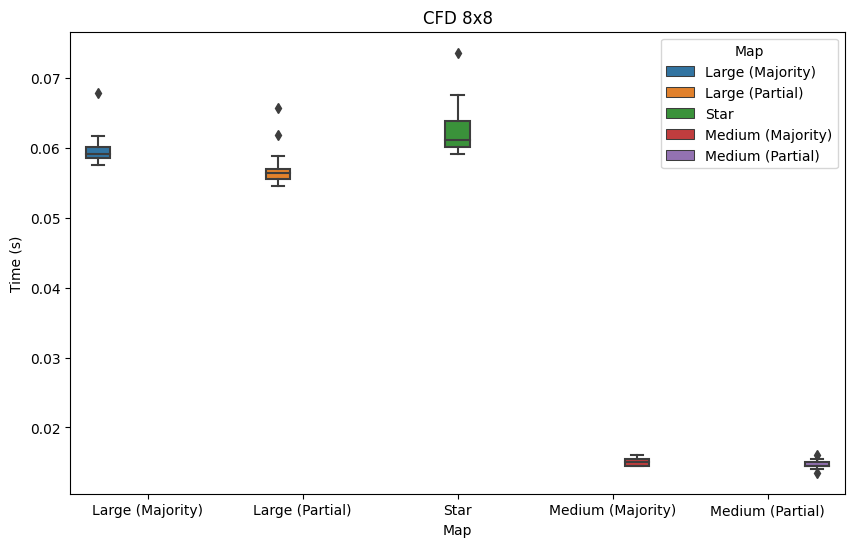

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Map", y="Time (s)", hue="Map", data=all_32_dfs).set(title="CFD 8x8")
plt.show()